In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay


In [2]:
data =pd.read_csv("/content/drive/MyDrive/Excelr/Assignments/DataSets/Pharma_Industry.csv")

In [3]:
data

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1
...,...,...,...,...,...,...
495,-1.553759,0.506938,0.817890,-0.661245,-1.345393,0
496,0.551476,1.714321,0.340589,1.712558,-0.496315,1
497,-1.072743,-0.221137,0.239247,1.112924,-0.285838,1
498,1.661259,0.245759,-0.457096,0.633355,0.657413,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [5]:
data.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [6]:
data.isnull().sum()

,0
Drug Dosage (mg),0
Systolic Blood Pressure (mmHg),0
Heart Rate (BPM),0
Liver Toxicity Index (U/L),0
Blood Glucose Level (mg/dL),0
Drug Response,0


In [7]:
print("\nClass Distribution:\n", data["Drug Response"].value_counts())


Class Distribution:
 Drug Response
1    260
0    240
Name: count, dtype: int64


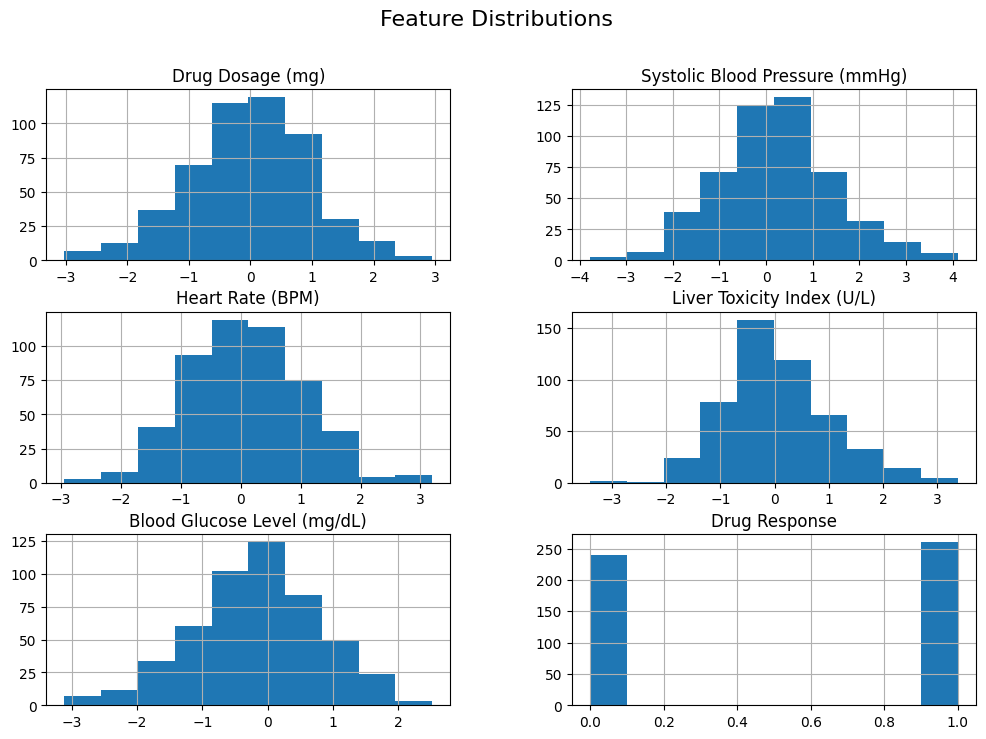

In [8]:
# Histograms
data.hist(figsize=(12,8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.show()

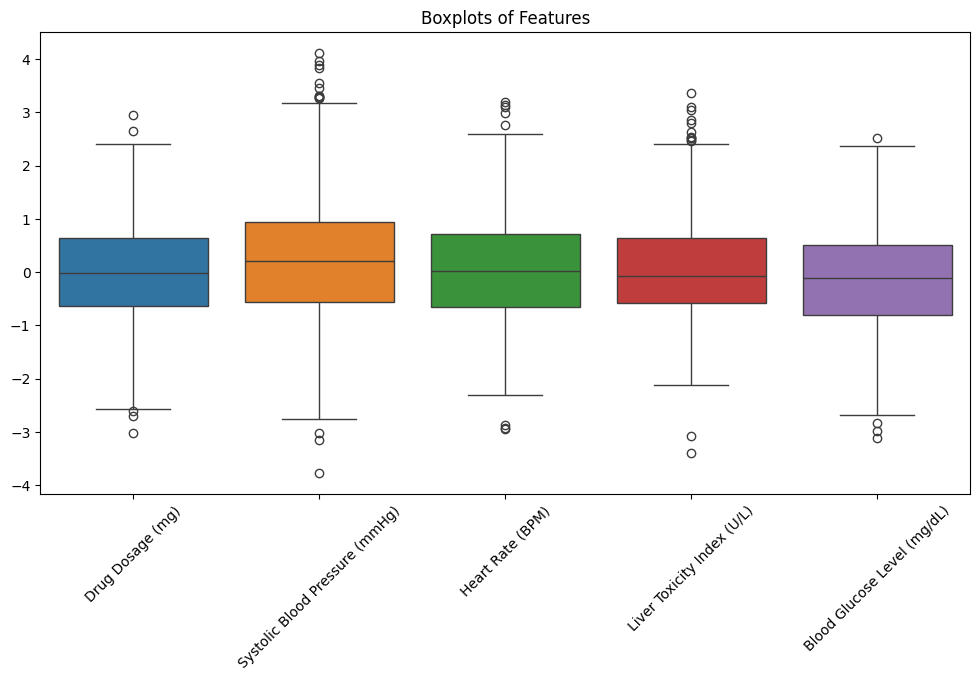

In [9]:

# Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(data=data.drop(columns="Drug Response"))
plt.title("Boxplots of Features")
plt.xticks(rotation=45)
plt.show()

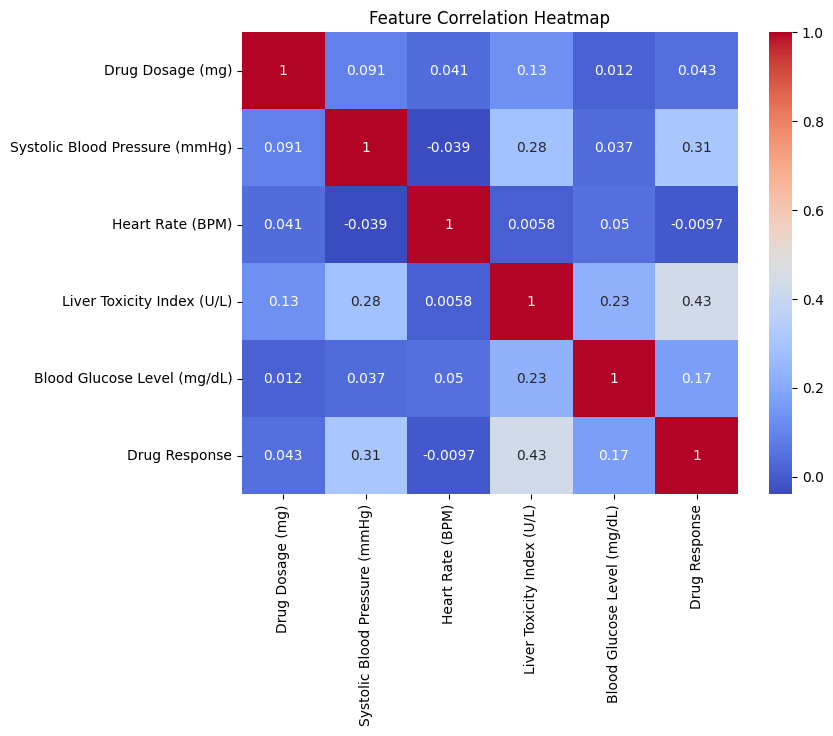

In [11]:
 #Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [12]:
X = data.drop(columns=["Drug Response"])
y = data["Drug Response"]

In [13]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [14]:

# Standardization (important for SVM)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


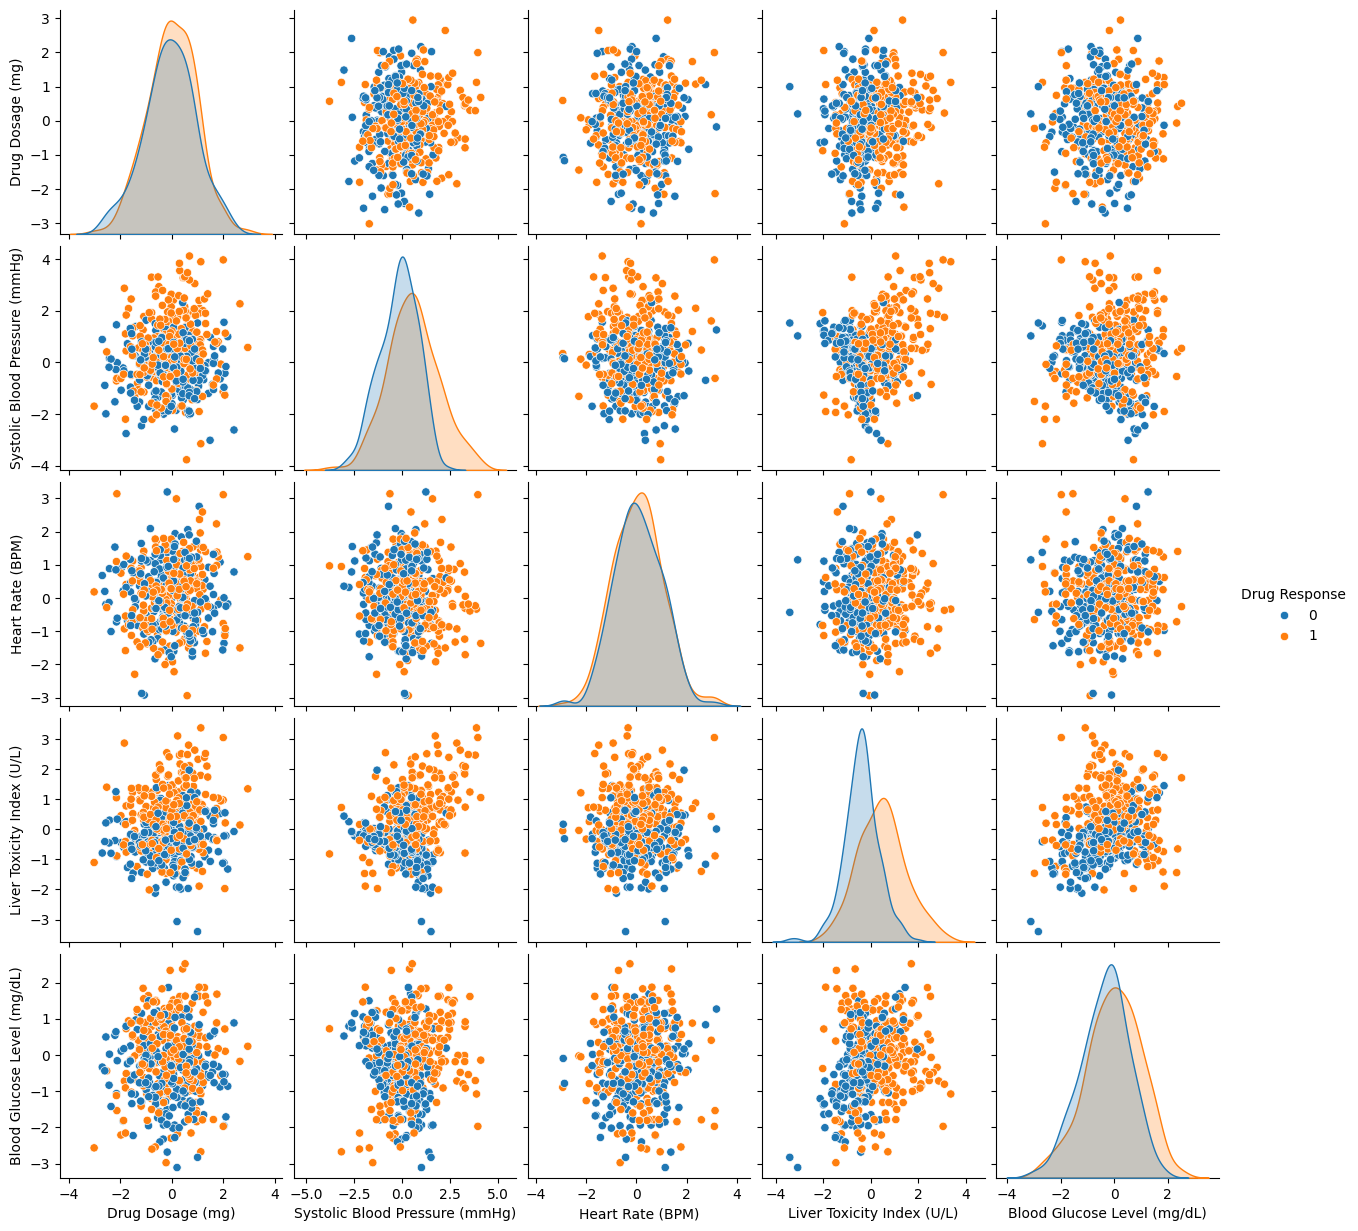

In [15]:
# Pairplot
sns.pairplot(data, hue="Drug Response", diag_kind="kde")
plt.show()

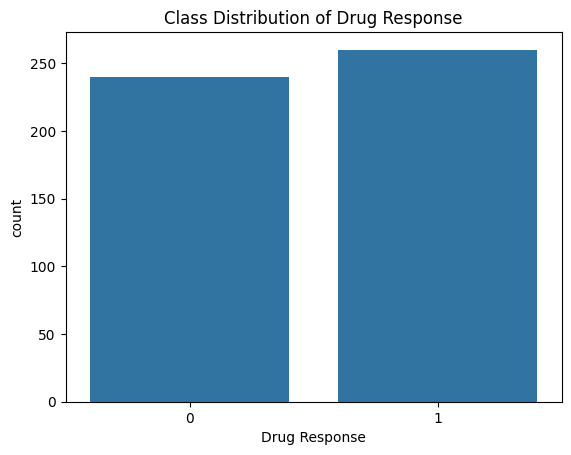

In [16]:
# Class balance
sns.countplot(x=y)
plt.title("Class Distribution of Drug Response")
plt.show()

In [17]:
svm_model = SVC(kernel="linear", random_state=42)
svm_model.fit(X_train, y_train)

y_pred = svm_model.predict(X_test)

In [18]:
print("\n=== SVM (Linear Kernel) Performance ===")
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


=== SVM (Linear Kernel) Performance ===
Accuracy: 0.72
              precision    recall  f1-score   support

           0       0.69      0.77      0.73        48
           1       0.76      0.67      0.71        52

    accuracy                           0.72       100
   macro avg       0.72      0.72      0.72       100
weighted avg       0.72      0.72      0.72       100



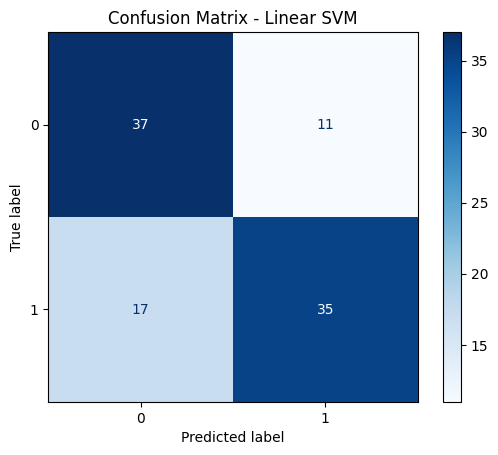

In [19]:
# Confusion Matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap="Blues")
plt.title("Confusion Matrix - Linear SVM")
plt.show()

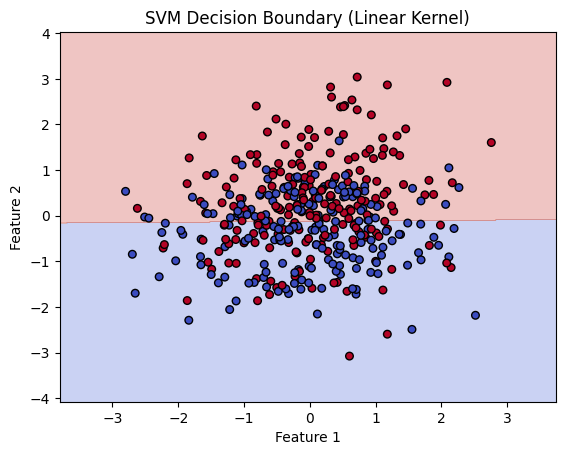

In [23]:
# ======================================================
# Task 5: Visualization of Decision Boundary (Fixed)
# ======================================================

def plot_svm_boundary(model, X, y, title):
    # Use only first 2 features for plotting
    X_plot = X[:, :2]
    h = 0.02

    # Create meshgrid
    x_min, x_max = X_plot[:, 0].min() - 1, X_plot[:, 0].max() + 1
    y_min, y_max = X_plot[:, 1].min() - 1, X_plot[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # If dataset has more than 2 features, pad the extra dimensions with zeros
    n_extra = X.shape[1] - 2
    if n_extra > 0:
        grid = np.c_[xx.ravel(), yy.ravel(), np.zeros((len(xx.ravel()), n_extra))]
    else:
        grid = np.c_[xx.ravel(), yy.ravel()]

    # Predict over grid
    Z = model.predict(grid)
    Z = Z.reshape(xx.shape)

    # Plot decision regions + points
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y, s=30, edgecolors="k", cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()


plot_svm_boundary(svm_model, X_train, y_train, "SVM Decision Boundary (Linear Kernel)")


In [24]:
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "poly", "rbf", "sigmoid"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [25]:

print("\nBest Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best CV Accuracy: 0.7525000000000001


In [26]:
best_model = grid.best_estimator_
y_pred_best = best_model.predict(X_test)

In [28]:
print("\n Tuned SVM Performance ")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


 Tuned SVM Performance 
Accuracy: 0.77
              precision    recall  f1-score   support

           0       0.79      0.71      0.75        48
           1       0.75      0.83      0.79        52

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100



In [29]:
kernels = ["linear", "poly", "rbf", "sigmoid"]
results = {}

In [30]:
for k in kernels:
    model = SVC(kernel=k, C=1, gamma="scale", random_state=42)
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    acc = accuracy_score(y_test, pred)
    results[k] = acc
    print(f"Kernel={k}, Accuracy={acc:.4f}")


Kernel=linear, Accuracy=0.7200
Kernel=poly, Accuracy=0.6500
Kernel=rbf, Accuracy=0.7700
Kernel=sigmoid, Accuracy=0.7300


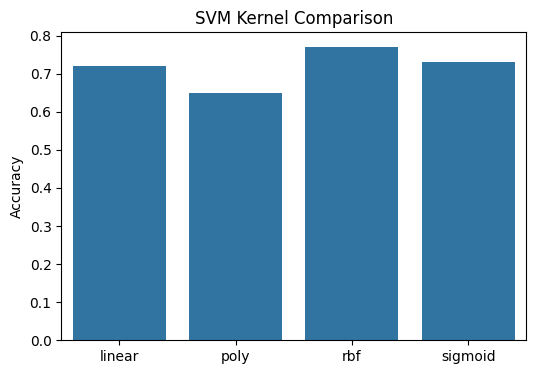

In [31]:
# Barplot of kernel accuracies
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()))
plt.ylabel("Accuracy")
plt.title("SVM Kernel Comparison")
plt.show()


#  Final Analysis

1. The **linear kernel** performs well when the data is linearly separable.
2. The **RBF kernel** usually provides the best performance for complex, nonlinear patterns.
3. The **polynomial kernel** can overfit if the degree is too high.
4. **Sigmoid kernel** is less commonly effective but can work in specific cases.
5. Hyperparameter tuning significantly improves accuracy by optimizing **C** and **gamma**.
6. In real-world drug response prediction:
   - Machine learning helps reduce trial-and-error in drug prescriptions.
   - SVM is effective for handling high-dimensional biological data.
   - Personalized medicine becomes feasible when models can predict patient responses accurately.
